In [1]:
import numpy as np
import glob
import time 
import datetime
import os
import random
import pandas as pd
import matplotlib
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import concatenate
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from sklearn.cluster import AgglomerativeClustering
from tensorflow.keras.callbacks import EarlyStopping
import keras.backend as K
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Lambda, BatchNormalization, Dropout, Conv2D
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D, GaussianNoise
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

# Предобработка

In [2]:
names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
filename = 'semeion.data'
df = pd.read_csv(filename, sep=' ', header=None)

In [4]:
df

0    1    2    3    4    5    6    7    8    9    ...  257  258  259  \
0     0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  ...    0    0    0   
1     0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  ...    0    0    0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...    0    0    0   
3     0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  ...    0    0    0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1588  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...    0    0    0   
1589  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...    0    0    0   
1590  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...    0    0    0   
1591  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...    0    0    0   
1592  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  ...    0    0    0   

      260  261  262  263  264  265  266  
0       0    0    0    0    0    0  NaN  
1       0    0    0    0    0    0  NaN  
2       0    0    0    0    0    0  NaN  
3       0    0    0    0    0    0  NaN  
4       0    0    0    0    0    0  NaN  
...   ...  ...  ...  ...  ...  ...  ...  
1588    0    0    0    0    0    1  NaN  
1589    0    0    0    0    0    1  NaN  
1590    0    0    0    0    0    1  NaN  
1591    0    0    0    0    0    1  NaN  
1592    0    0    0    0    0    1  NaN  

[1593 rows x 267 columns]

In [5]:
def fromOneHot(row):
    return tf.argmax(row, axis=0).numpy()

In [6]:
data = df.iloc[:, :-11]
target = df.iloc[:, 256:-1]

In [7]:
target

256  257  258  259  260  261  262  263  264  265
0       1    0    0    0    0    0    0    0    0    0
1       1    0    0    0    0    0    0    0    0    0
2       1    0    0    0    0    0    0    0    0    0
3       1    0    0    0    0    0    0    0    0    0
4       1    0    0    0    0    0    0    0    0    0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1588    0    0    0    0    0    0    0    0    0    1
1589    0    0    0    0    0    0    0    0    0    1
1590    0    0    0    0    0    0    0    0    0    1
1591    0    0    0    0    0    0    0    0    0    1
1592    0    0    0    0    0    0    0    0    0    1

[1593 rows x 10 columns]

In [8]:
data['target'] = target.apply (lambda row: fromOneHot(row), axis=1)

In [9]:
data

0    1    2    3    4    5    6    7    8    9  ...  247  248  249  \
0     0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1588  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   
1589  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
1590  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  1.0   
1591  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  1.0   
1592  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0   

      250  251  252  253  254  255  target  
0     0.0  0.0  0.0  0.0  0.0  0.0       0  
1     1.0  0.0  0.0  0.0  0.0  0.0       0  
2     0.0  0.0  0.0  0.0  0.0  0.0       0  
3     0.0  0.0  0.0  0.0  0.0  0.0       0  
4     0.0  0.0  0.0  0.0  0.0  0.0       0  
...   ...  ...  ...  ...  ...  ...     ...  
1588  0.0  0.0  0.0  1.0  1.0  0.0       9  
1589  1.0  1.0  1.0  0.0  0.0  0.0       9  
1590  1.0  0.0  0.0  0.0  0.0  0.0       9  
1591  1.0  0.0  0.0  0.0  0.0  0.0       9  
1592  0.0  0.0  0.0  0.0  0.0  0.0       9  

[1593 rows x 257 columns]

In [10]:
def show_image(X, y, index):
    plt.imshow(np.reshape(X.iloc[index].to_numpy(), (16, 16)))
    plt.xlabel(names[int(target.iloc[index].values[0])])
    plt.show()

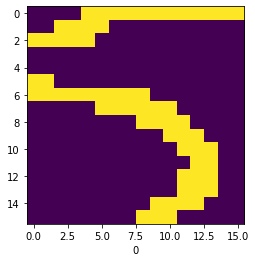

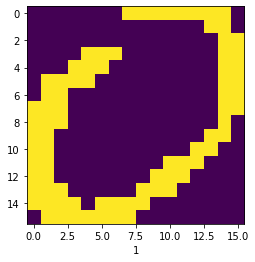

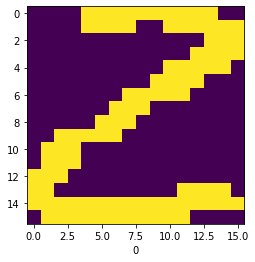

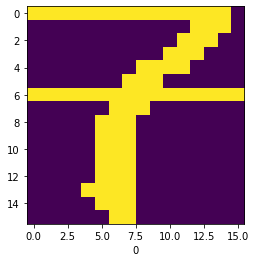

In [11]:
for i in [100, 200, 450, 1500]:
    show_image(data.iloc[:, :-1], data[['target']], i)

In [12]:
X = data.iloc[:, :-1].to_numpy()
X.shape

(1593, 256)

In [13]:
y = data.iloc[:, -1].to_numpy()
y.shape

(1593,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1497, 256)
(1497,)
(96, 256)
(96,)


In [16]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

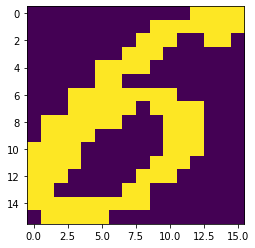

In [17]:
plt.imshow(X_train[100].reshape(16, 16))

In [18]:
X_train.shape, X_test.shape

((1497, 256), (96, 256))

In [19]:
batch_size = 22
X_train = X_train[: len(X_train) - (len(X_train) % batch_size)]
y_train = y_train[: len(y_train) - (len(y_train) % batch_size)]
X_test = X_test[: len(X_test) - (len(X_test) % batch_size)]
y_test = y_test[: len(y_test) - (len(y_test) % batch_size)]

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1496, 256)
(1496, 1)
(88, 256)
(88, 1)


In [21]:
X_train = np.reshape(X_train, (len(X_train), 16, 16, 1))
X_test  = np.reshape(X_test,  (len(X_test),  16, 16, 1))

In [22]:
X_train.shape

(1496, 16, 16, 1)

In [23]:
X_test.shape

(88, 16, 16, 1)

# 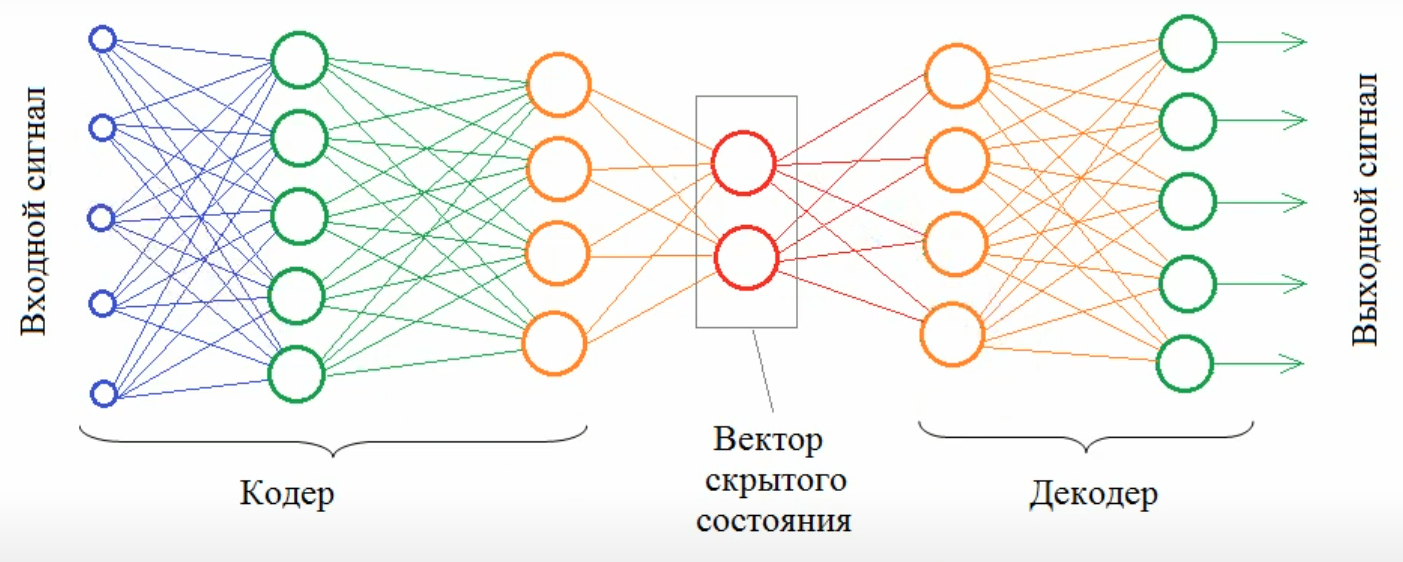

In [24]:
def get_check_callback(name):
    checkpoint_name = 'checkpoints/' + name
    return tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_name, save_weights_only=True, verbose=1)

# 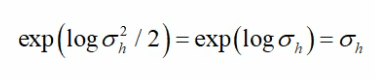

In [25]:
def noiser(args):
    global z_mean, z_log_var
    z_mean, z_log_var, hidden_dim = args
    N = K.random_normal(shape=(batch_size, hidden_dim), mean=0., stddev=1.0)
    return K.exp(z_log_var / 2) * N + z_mean

## В процессе обучения вариационного автоэнкодера минимизируем сразу два параметра: потерю реконструкции (mse) и критерий Кульбака-Лейблера для соответствия векторов скрытого состояния нормальному Гауссовскому распределению

In [26]:
def vae_loss(x, y):
    x = K.reshape(x, shape=(batch_size, 16*16))
    y = K.reshape(y, shape=(batch_size, 16*16))
    loss = K.sum(K.square(x-y), axis=-1)
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return loss + kl_loss

In [27]:
def dropout_and_batch(x):
    return Dropout(0.2)(BatchNormalization()(x))

In [28]:
def decoder_predict(decoder, coordinates):
    img = decoder.predict(np.expand_dims(coordinates, axis=0))
    plt.imshow(img.squeeze(), cmap='gray')

# 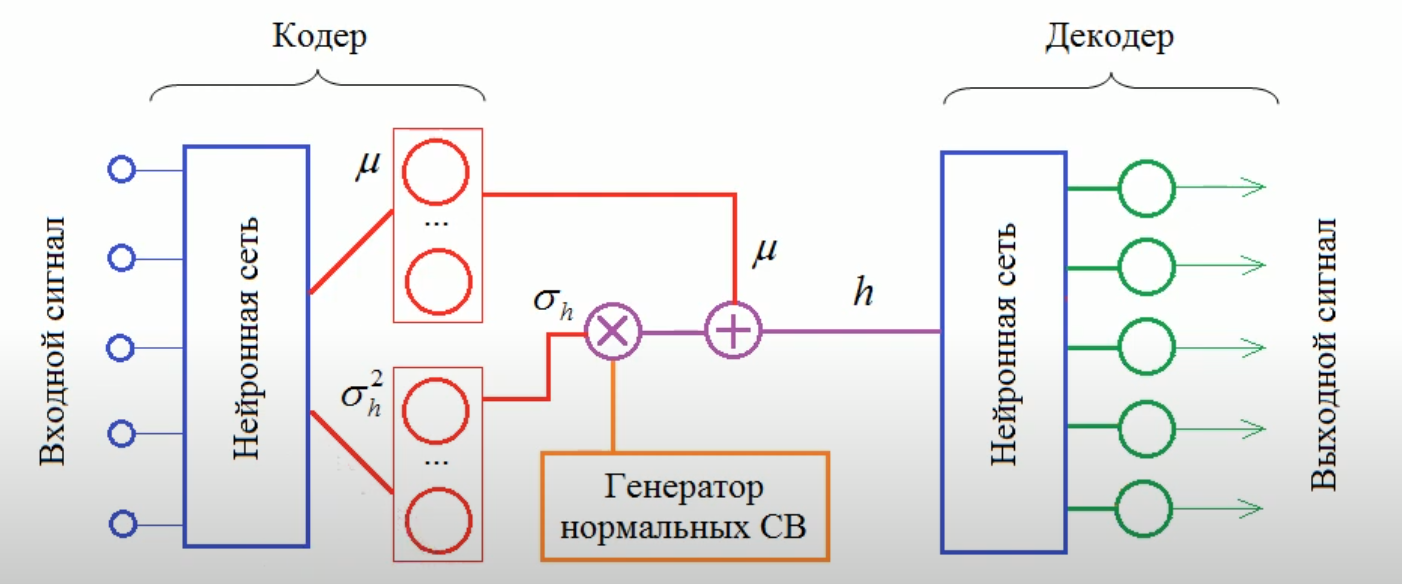

In [29]:
def get_vae(hidden_dim=2, activation='relu', denses=[256, 128], shape=(16, 16)):
    input_img = Input((shape[0], shape[1], 1))
    layer = Flatten()(input_img)
    for d in denses:
        layer = Dense(d, activation=activation)(layer)
        layer = dropout_and_batch(layer)

    z_mean = Dense(hidden_dim)(layer)
    z_log_var = Dense(hidden_dim)(layer)
    
    input_dec = Input(shape=(hidden_dim,))
    layer = input_dec
    
    for d in reversed(denses):
        layer = Dense(d, activation=activation)(layer)
        layer = dropout_and_batch(layer)
        
    layer = Dense(shape[0] * shape[1], activation='sigmoid')(layer)
    decoded = Reshape((shape[0], shape[1], 1))(layer)
    
    h = Lambda(noiser, output_shape=(hidden_dim,))([z_mean, z_log_var, hidden_dim])
    
    encoder = keras.Model(input_img, h, name='encoder')
    decoder = keras.Model(input_dec, decoded, name='decoder')
    vae = keras.Model(input_img, decoder(encoder(input_img)), name="vae")
    
    print(vae.summary())
    
    return vae, encoder, decoder

# 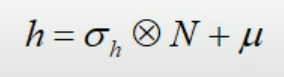

# 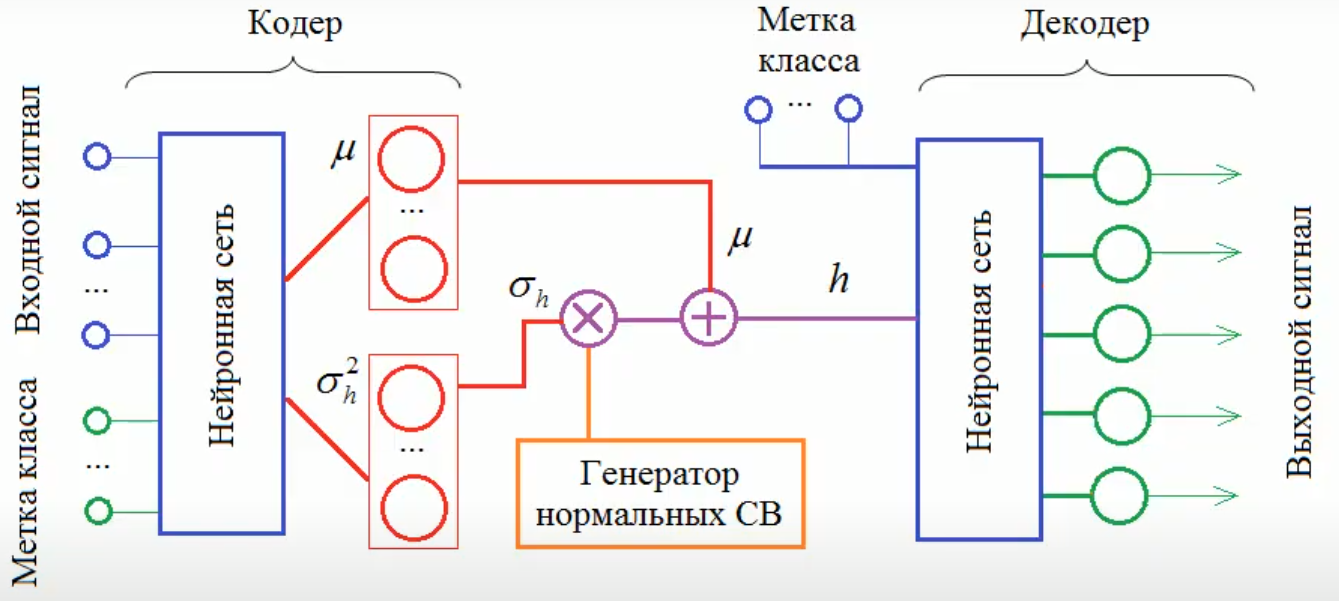

In [30]:
def get_cvae(hidden_dim=2, num_classes=10, activation='relu', denses=[256, 128]):
    input_img = Input((16, 16, 1))
    
    layer = Flatten()(input_img)
    fl = Flatten()(input_img)
    lb = Input(shape=(num_classes,))
    layer = concatenate([fl, lb])
    for d in denses:
        layer = Dense(d, activation=activation)(layer)
        layer = dropout_and_batch(layer)
        
    z_mean2 = Dense(hidden_dim)(layer)
    z_log_var = Dense(hidden_dim)(layer)
    
    h = Lambda(noiser, output_shape=(hidden_dim,))([z_mean2, z_log_var, hidden_dim])

    input_dec = Input(shape=(hidden_dim,))
    lb_dec = Input(shape=(num_classes,))
    layer = concatenate([input_dec, lb_dec])
    for d in reversed(denses):
        layer = Dense(d, activation=activation)(layer)
        layer = dropout_and_batch(layer)
    layer = Dense(16*16, activation='sigmoid')(layer)
    decoded = Reshape((16, 16, 1))(layer)

    encoder = keras.Model([input_img, lb], h, name='encoder')
    decoder = keras.Model([input_dec, lb_dec], decoded, name='decoder')
    cvae = keras.Model([input_img, lb, lb_dec], decoder([encoder([input_img, lb]), lb_dec]), name="cvae")
    
    print(cvae.summary())
    
    return cvae, encoder, decoder

In [31]:
def generate(decoder, n, dims=2):
    total = 2 * n + 1
    plt.figure(figsize=(total, total))
    num = 1
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            ax = plt.subplot(total, total, num)
            num += 1
            code = []
            for k in range(dims):
                code.append(random.gauss(0, 1))
            img = decoder.predict(np.expand_dims(code, axis=0))
            plt.imshow(img.squeeze(), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

In [32]:
def get_board_callback(name):
    log_dir = "logs/fit/"
    return tf.keras.callbacks.TensorBoard(log_dir=log_dir + name, histogram_freq=1)

In [33]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

sigmoid_v = np.vectorize(sigmoid)

In [34]:
def gini(arr):
    counts = np.unique(arr, return_counts=True)[1]
    gini = 1 - ((counts / arr.size) ** 2).sum()
    return gini

# Model 1. Hidden dim = 2

In [35]:
hidden_dim = 2
model1, encoder1, decoder1 = get_vae(hidden_dim=hidden_dim, denses=[1028, 512, 128])

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16, 16, 1)]       0         
_________________________________________________________________
encoder (Functional)         (22, 2)                   863896    
_________________________________________________________________
decoder (Functional)         (None, 16, 16, 1)         863892    
Total params: 1,727,788
Trainable params: 1,721,116
Non-trainable params: 6,672
_________________________________________________________________
None


In [36]:
X_test.shape
X_train.shape

(1496, 16, 16, 1)

In [37]:
es1 = EarlyStopping(monitor='loss', verbose=1, patience=5)
model1.compile(optimizer='adam', loss=vae_loss)
model1.fit(X_train, X_train, epochs=80, batch_size=22, shuffle=True, validation_data=(X_test, X_test),
           callbacks=[es1, get_check_callback("model1"), get_board_callback("model1")])

Epoch 1/80
68/68 [==============================] - 3s 14ms/step - loss: 80.1942 - val_loss: 56.1175

Epoch 00001: saving model to checkpoints/model1
Epoch 2/80
68/68 [==============================] - 0s 6ms/step - loss: 63.3563 - val_loss: 52.1317

Epoch 00002: saving model to checkpoints/model1
Epoch 3/80
68/68 [==============================] - 0s 7ms/step - loss: 56.9249 - val_loss: 51.0774

Epoch 00003: saving model to checkpoints/model1
Epoch 4/80
68/68 [==============================] - 0s 6ms/step - loss: 55.2422 - val_loss: 50.4822

Epoch 00004: saving model to checkpoints/model1
Epoch 5/80
68/68 [==============================] - 0s 6ms/step - loss: 53.8951 - val_loss: 49.0456

Epoch 00005: saving model to checkpoints/model1
Epoch 6/80
68/68 [==============================] - 0s 6ms/step - loss: 52.5824 - val_loss: 48.9720

Epoch 00006: saving model to checkpoints/model1
Epoch 7/80
68/68 [==============================] - 0s 7ms/step - loss: 52.1828 - val_loss: 47.9526

Epoc

In [38]:
h = encoder1.predict(X_test, batch_size=batch_size)

In [39]:
h.shape

(88, 2)

<Figure size 792x792 with 0 Axes>

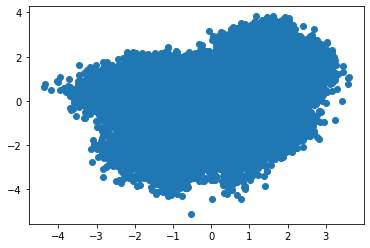

<Figure size 792x792 with 0 Axes>

In [40]:
h = encoder1.predict(np.reshape(X, (len(X), 16, 16, 1)), batch_size=1)
plt.scatter(h[:, 0], h[:, 1])
n = 5
total = 2 * n + 1
plt.figure(figsize=(total, total))

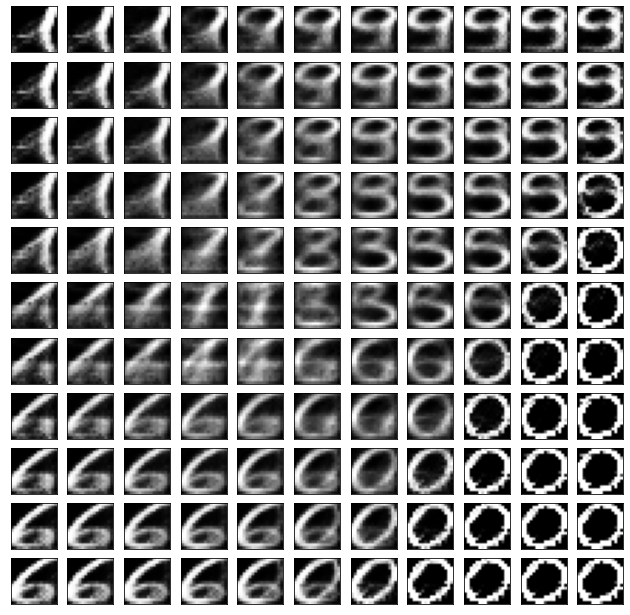

In [41]:
n = 5
total = 2 * n + 1
plt.figure(figsize=(total, total))
num = 1
for i in range(-n, n+1):
    for j in range(-n, n+1):
        ax = plt.subplot(total, total, num)
        num += 1
        img = decoder1.predict(np.expand_dims([3*i/n, 3*j/n], axis=0))
        plt.imshow(img.squeeze(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Model 2. Hidden dim = 3

In [42]:
hidden_dim = 3
model2, encoder2, decoder2 = get_vae(hidden_dim=hidden_dim, denses=[2048, 1028, 512, 128, 64])

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 16, 16, 1)]       0         
_________________________________________________________________
encoder (Functional)         (22, 3)                   3248986   
_________________________________________________________________
decoder (Functional)         (None, 16, 16, 1)         3249044   
Total params: 6,498,030
Trainable params: 6,482,910
Non-trainable params: 15,120
_________________________________________________________________
None


In [43]:
%%time
es2 = EarlyStopping(monitor='loss', verbose=1, patience=5)
model2.compile(optimizer='adam', loss=vae_loss)
model2.fit(X_train, X_train, epochs=50, batch_size=batch_size, shuffle=True, 
           validation_data=(X_test, X_test),
           callbacks=[es2, get_check_callback("model2"), get_board_callback("model2")])

Epoch 1/50
68/68 [==============================] - 3s 16ms/step - loss: 84.8368 - val_loss: 55.2422

Epoch 00001: saving model to checkpoints/model2
Epoch 2/50
68/68 [==============================] - 1s 9ms/step - loss: 64.3056 - val_loss: 54.2884

Epoch 00002: saving model to checkpoints/model2
Epoch 3/50
68/68 [==============================] - 1s 8ms/step - loss: 58.1818 - val_loss: 52.3182

Epoch 00003: saving model to checkpoints/model2
Epoch 4/50
68/68 [==============================] - 1s 8ms/step - loss: 56.2365 - val_loss: 50.5640

Epoch 00004: saving model to checkpoints/model2
Epoch 5/50
68/68 [==============================] - 1s 8ms/step - loss: 54.9203 - val_loss: 51.2543

Epoch 00005: saving model to checkpoints/model2
Epoch 6/50
68/68 [==============================] - 1s 9ms/step - loss: 53.5508 - val_loss: 49.8010

Epoch 00006: saving model to checkpoints/model2
Epoch 7/50
68/68 [==============================] - 1s 8ms/step - loss: 53.6974 - val_loss: 49.6523

Epoc

In [44]:
h2 = encoder2.predict(X_test, batch_size=1)

In [45]:
h2.shape

(1936, 3)

CPU times: user 1min 26s, sys: 1.74 s, total: 1min 28s
Wall time: 11.1 s


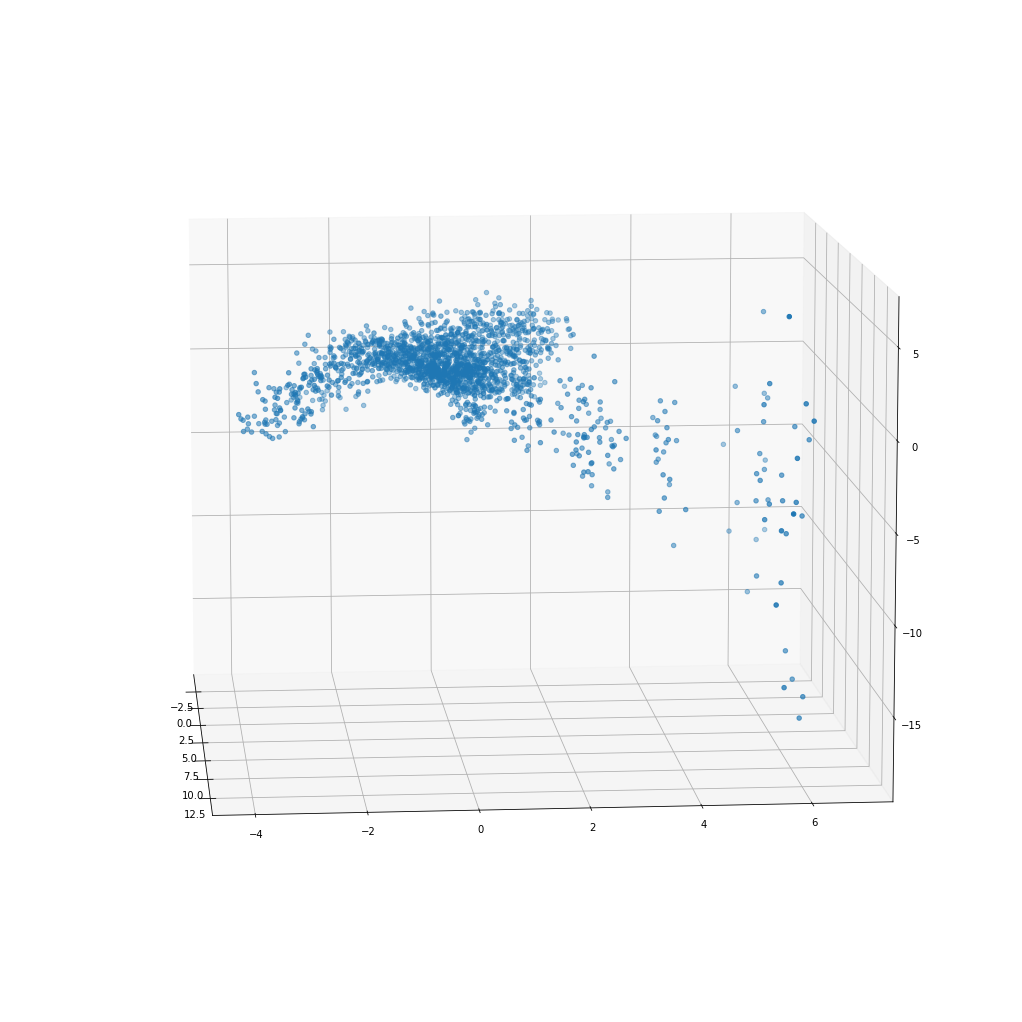

In [46]:
%%time
fig = plt.figure(figsize=(14, 14))
ax = Axes3D(fig)

ax.scatter(h2[:, 0], h2[:, 1], h2[:, 2])
j = 0
for i in range(0, 360, 5):
    ax.view_init(elev=10, azim=i)
    plt.savefig("./movie/movie%d.png" % (i))

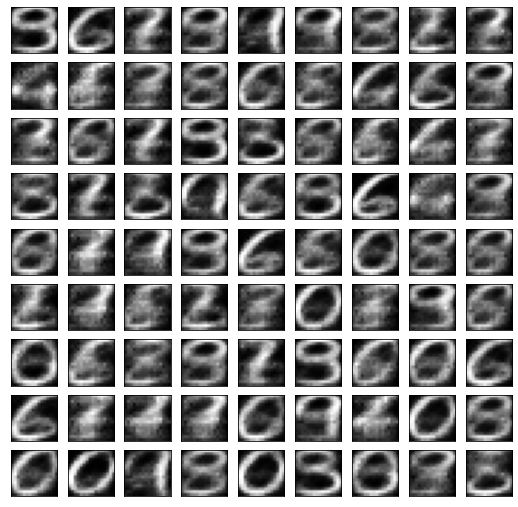

In [47]:
n = 4
total = 2 * n + 1
plt.figure(figsize=(total, total))
num = 1
for i in range(-n, n+1):
    for j in range(-n, n+1):
        ax = plt.subplot(total, total, num)
        num += 1
        a, b, c = random.gauss(0, 1), random.gauss(0, 1), random.gauss(0, 1) 
        decoder_predict(decoder2, [a, b, c])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Model 3. Hidden dim = 10

In [48]:
hidden_dim = 10
model3, encoder3, decoder3 = get_vae(hidden_dim=hidden_dim, denses=[2048, 1028, 512, 128, 64])

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 16, 16, 1)]       0         
_________________________________________________________________
encoder (Functional)         (22, 10)                  3249896   
_________________________________________________________________
decoder (Functional)         (None, 16, 16, 1)         3249492   
Total params: 6,499,388
Trainable params: 6,484,268
Non-trainable params: 15,120
_________________________________________________________________
None


In [49]:
es3 = EarlyStopping(monitor='loss', verbose=1, patience=5)
model3.compile(optimizer='adam', loss=vae_loss)
model3.fit(X_train, X_train, epochs=60, batch_size=batch_size, shuffle=True, 
           validation_data=(X_test, X_test), callbacks=[es3, get_check_callback("model3"), 
                                                        get_board_callback("model3")])

Epoch 1/60
68/68 [==============================] - 3s 18ms/step - loss: 95.6326 - val_loss: 55.8939

Epoch 00001: saving model to checkpoints/model3
Epoch 2/60
68/68 [==============================] - 1s 8ms/step - loss: 69.9141 - val_loss: 53.8132

Epoch 00002: saving model to checkpoints/model3
Epoch 3/60
68/68 [==============================] - 1s 8ms/step - loss: 60.7545 - val_loss: 52.6763

Epoch 00003: saving model to checkpoints/model3
Epoch 4/60
68/68 [==============================] - 1s 9ms/step - loss: 59.0752 - val_loss: 50.2144

Epoch 00004: saving model to checkpoints/model3
Epoch 5/60
68/68 [==============================] - 1s 9ms/step - loss: 56.4390 - val_loss: 51.0437

Epoch 00005: saving model to checkpoints/model3
Epoch 6/60
68/68 [==============================] - 1s 8ms/step - loss: 56.0059 - val_loss: 48.5835

Epoch 00006: saving model to checkpoints/model3
Epoch 7/60
68/68 [==============================] - 1s 8ms/step - loss: 53.9511 - val_loss: 49.1058

Epoc

In [50]:
h3 = encoder3.predict(X_test, batch_size=1)
h3.shape

(1936, 10)

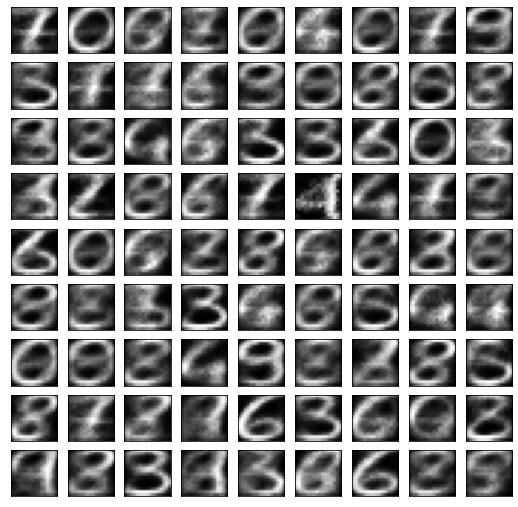

In [51]:
generate(decoder3, n=4, dims=hidden_dim)

# Model 4. CVAE

## Conditional variation autoencoder

In [52]:
model4, encoder4, decoder4 = get_cvae()

Model: "cvae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 16, 16, 1)]  0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
encoder (Functional)            (22, 2)              103300      input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 10)]         0                                         

In [53]:
X_test.shape

(88, 16, 16, 1)

In [54]:
es4 = EarlyStopping(monitor='loss', verbose=1, patience=10)
model4.compile(optimizer='adam', loss=vae_loss)
model4.fit([X_train, to_categorical(y_train), to_categorical(y_train)], X_train, 
           epochs=60, batch_size=batch_size, shuffle=True, callbacks=[es4, get_board_callback("model4")])

Epoch 1/60
68/68 [==============================] - 1s 8ms/step - loss: 73.9967
Epoch 2/60
68/68 [==============================] - 0s 5ms/step - loss: 59.1129
Epoch 3/60
68/68 [==============================] - 0s 5ms/step - loss: 49.9047
Epoch 4/60
68/68 [==============================] - 0s 5ms/step - loss: 46.1327
Epoch 5/60
68/68 [==============================] - 0s 5ms/step - loss: 44.6567
Epoch 6/60
68/68 [==============================] - 0s 5ms/step - loss: 43.9820
Epoch 7/60
68/68 [==============================] - 0s 5ms/step - loss: 43.0813
Epoch 8/60
68/68 [==============================] - 0s 5ms/step - loss: 42.8832
Epoch 9/60
68/68 [==============================] - 0s 5ms/step - loss: 42.2997
Epoch 10/60
68/68 [==============================] - 0s 5ms/step - loss: 41.7023
Epoch 11/60
68/68 [==============================] - 0s 5ms/step - loss: 41.1162
Epoch 12/60
68/68 [==============================] - 0s 6ms/step - loss: 41.2223
Epoch 13/60
68/68 [==================

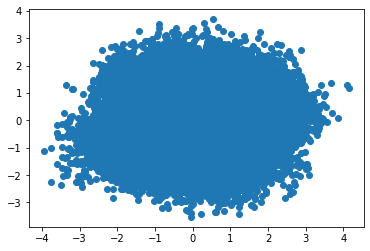

In [55]:
lb = lb_dec = to_categorical(y)
h = encoder4.predict([np.reshape(X, (len(X), 16, 16, 1)), lb], batch_size=1)
plt.scatter(h[:, 0], h[:, 1])

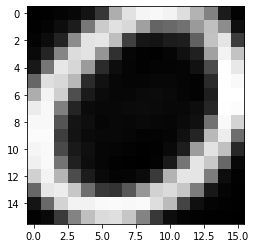

In [56]:
input_lbl = np.zeros((1, 10))
input_lbl[0, 0] = 1
dot = np.zeros((1, 2))
dot[0, :] = [0, 0]
img = decoder4.predict([dot, input_lbl])
plt.imshow(img.squeeze(), cmap='gray')

In [57]:
def generate_digit(n, decoder, k):
    input_lbl = np.zeros((1, 10))
    input_lbl[0, k] = 1
    total = 2 * n + 1
    plt.figure(figsize=(total, total))
    num = 1
    dot = np.zeros((1, 2))
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            ax = plt.subplot(total, total, num)
            num += 1
            a, b = random.gauss(0, 1), random.gauss(0, 1)
            dot[0, :] = [a, b]
            img = decoder4.predict([dot, input_lbl])
            plt.imshow(img.squeeze(), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

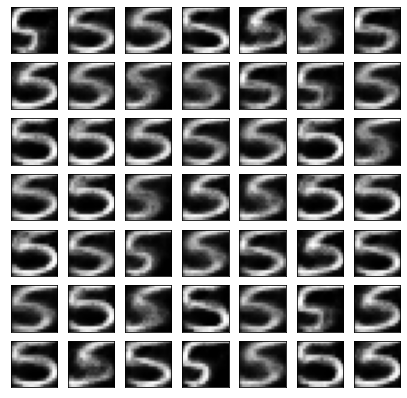

In [58]:
generate_digit(3, decoder4, 5)

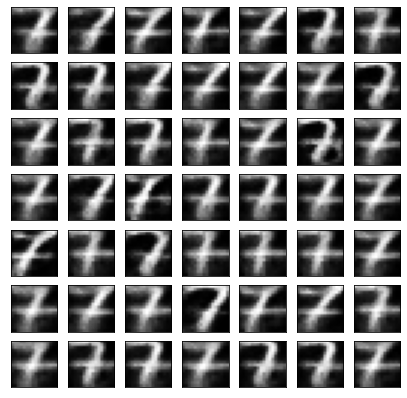

In [59]:
generate_digit(3, decoder4, 7)

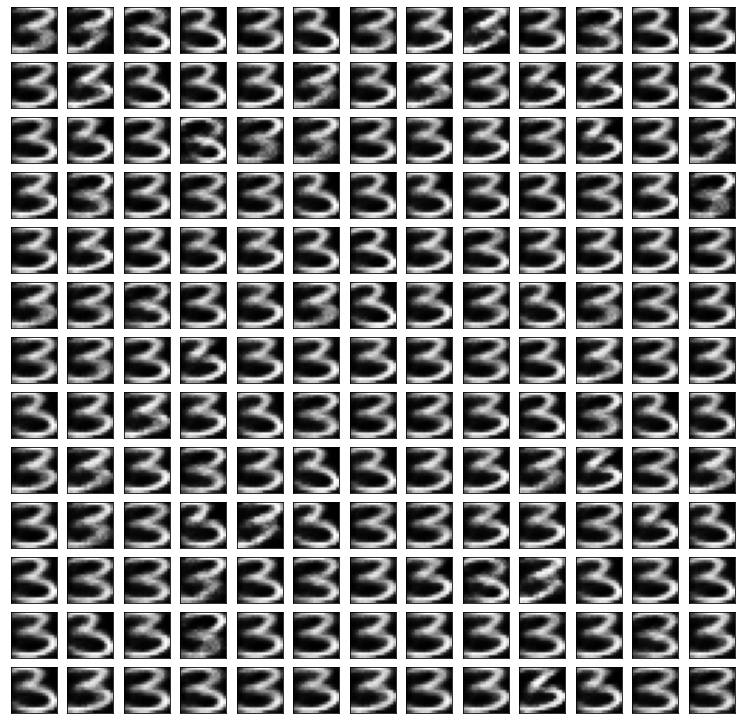

In [60]:
generate_digit(6, decoder4, 3)

# Model 5. MNIST

In [61]:
batch_size = 100  # должно быть кратно 60 000 и 10 0000

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [62]:
hidden_dim = 20
model5, encoder5, decoder5 = get_vae(hidden_dim=hidden_dim, denses=[2048, 1028, 512, 128, 64], shape=(28, 28))

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (100, 20)                 4332540   
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         4332004   
Total params: 8,664,544
Trainable params: 8,649,424
Non-trainable params: 15,120
_________________________________________________________________
None


In [63]:
x_train.shape

(60000, 28, 28, 1)

In [64]:
def mnist_vae_loss(x, y):
    x = K.reshape(x, shape=(batch_size, 28*28))
    y = K.reshape(y, shape=(batch_size, 28*28))
    loss = K.sum(K.square(x-y), axis=-1)
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return loss + kl_loss

In [65]:
es5 = EarlyStopping(monitor='loss', verbose=1, patience=2)
model5.compile(optimizer='adam', loss=mnist_vae_loss)
model5.fit(x_train, x_train, epochs=60, batch_size=batch_size, shuffle=True, 
           validation_data=(x_test, x_test), callbacks=[es5, get_check_callback("model5"), 
                                                        get_board_callback("model5")])

Epoch 1/60
600/600 [==============================] - 8s 11ms/step - loss: 106.4397 - val_loss: 47.6113

Epoch 00001: saving model to checkpoints/model5
Epoch 2/60
600/600 [==============================] - 6s 10ms/step - loss: 52.8075 - val_loss: 43.8036

Epoch 00002: saving model to checkpoints/model5
Epoch 3/60
600/600 [==============================] - 6s 10ms/step - loss: 48.5126 - val_loss: 41.6925

Epoch 00003: saving model to checkpoints/model5
Epoch 4/60
600/600 [==============================] - 6s 10ms/step - loss: 45.9614 - val_loss: 39.8420

Epoch 00004: saving model to checkpoints/model5
Epoch 5/60
600/600 [==============================] - 6s 10ms/step - loss: 43.9130 - val_loss: 37.9866

Epoch 00005: saving model to checkpoints/model5
Epoch 6/60
600/600 [==============================] - 6s 10ms/step - loss: 42.1551 - val_loss: 36.4488

Epoch 00006: saving model to checkpoints/model5
Epoch 7/60
600/600 [==============================] - 6s 10ms/step - loss: 40.3501 - va


Epoch 00054: saving model to checkpoints/model5
Epoch 55/60
600/600 [==============================] - 6s 10ms/step - loss: 33.5134 - val_loss: 29.3670

Epoch 00055: saving model to checkpoints/model5
Epoch 56/60
600/600 [==============================] - 6s 10ms/step - loss: 33.5216 - val_loss: 29.3614

Epoch 00056: saving model to checkpoints/model5
Epoch 57/60
600/600 [==============================] - 6s 10ms/step - loss: 33.4405 - val_loss: 29.2224

Epoch 00057: saving model to checkpoints/model5
Epoch 58/60
600/600 [==============================] - 6s 10ms/step - loss: 33.4230 - val_loss: 29.2493

Epoch 00058: saving model to checkpoints/model5
Epoch 59/60
600/600 [==============================] - 6s 10ms/step - loss: 33.2964 - val_loss: 29.1163

Epoch 00059: saving model to checkpoints/model5
Epoch 60/60
600/600 [==============================] - 6s 10ms/step - loss: 33.3401 - val_loss: 29.1323

Epoch 00060: saving model to checkpoints/model5


In [66]:
h5 = encoder5.predict(x_test, batch_size=100)
h5.shape

(10000, 20)

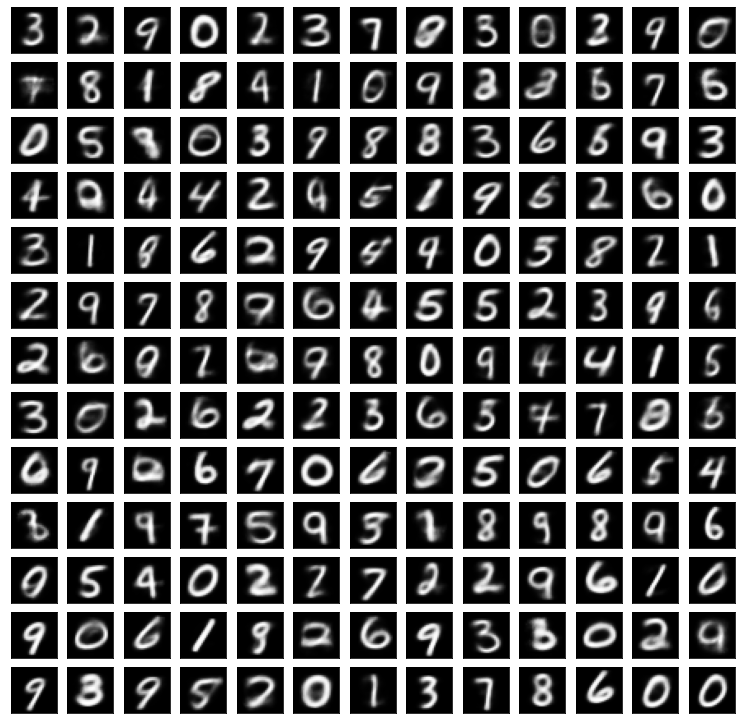

In [67]:
generate(decoder5, n=6, dims=hidden_dim)

# Hashing 

## 512-256-128-128-128-256-512-28*28

In [68]:
input_img = Input((28, 28, 1))
layer = Flatten()(input_img)
layer = Dense(512, activation='relu')(layer)
layer = dropout_and_batch(layer)
layer = Dense(256, activation='relu')(layer)
layer = dropout_and_batch(layer)
layer = Dense(128, activation='relu')(layer)
layer = dropout_and_batch(layer)
encoded = Dense(128, activation='sigmoid')(layer)

layer = Dense(128, activation='relu')(encoded)
layer = dropout_and_batch(layer)
layer = Dense(256, activation='relu')(layer)
layer = dropout_and_batch(layer)
layer = Dense(512, activation='relu')(layer)
layer = dropout_and_batch(layer)
layer = Dense(28 * 28, activation='sigmoid')(layer)
decoded = Reshape((28, 28, 1))(layer)

autoencoder1 = keras.Model(input_img, decoded, name="ae_gn1")

In [69]:
early_autoencoder1 = EarlyStopping(monitor='loss', verbose=1, patience=5)
autoencoder1.compile(loss='mse', optimizer='adam')
autoencoder1.fit(x_train, x_train, epochs=30, batch_size=100, callbacks=[early_autoencoder1, 
                                                                         get_board_callback("autoencoder1")])

Epoch 1/30
600/600 [==============================] - 5s 6ms/step - loss: 0.1036
Epoch 2/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0422
Epoch 3/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0316
Epoch 4/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0293
Epoch 5/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0280
Epoch 6/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0264
Epoch 7/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0254
Epoch 8/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0246
Epoch 9/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0242
Epoch 10/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0236
Epoch 11/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0232
Epoch 12/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0228
Epoch 13/30
600/600 [====

In [70]:
encoder_gn1 = tf.keras.Model(autoencoder1.layers[0].input, autoencoder1.layers[11].output)
hashes1 = np.round(encoder_gn1.predict(x_test, batch_size=batch_size))

In [71]:
cluster1 = AgglomerativeClustering(n_clusters=10, affinity='cosine', linkage='complete')
hash_labels1 = cluster1.fit_predict(hashes1)

In [72]:
hash_labels1.shape

(10000,)

In [73]:
hash_labels1

array([4, 0, 5, ..., 1, 0, 1])

In [75]:
gini_indexes = [gini(y_test[hash_labels1 == i]) for i in range(10)]

In [76]:
gini_indexes

[0.8227274129912495,
 0.6782868349564981,
 0.6270336725633494,
 0.6929820869979941,
 0.7053946799307959,
 0.7986826445602659,
 0.6571986190327033,
 0.5628985365615304,
 0.40972611243167967,
 0.7052098752652554]

In [77]:
def check(hashes, n, a: None, b: None):
    distance_matrix = cosine_similarity(hashes)
    distance_matrix[np.tril_indices_from(distance_matrix, 0)] = 0
    if a != None and b != None:
        index = np.unravel_index(np.argsort(distance_matrix.ravel())[a:b], distance_matrix.shape)
    else:
        index = np.unravel_index(np.argsort(distance_matrix.ravel())[-n:], distance_matrix.shape)
        
    for i in range(n):
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        axes[0].imshow(x_test[index[0][i]], cmap='gray')
        axes[0].set_axis_off()
        axes[1].imshow(x_test[index[1][i]], cmap='gray')
        axes[1].set_axis_off()
        plt.suptitle(f'Косинусное расстояние: {distance_matrix[index[0][i], index[1][i]]}')
        plt.show()

In [78]:
hashes1.shape

(10000, 128)

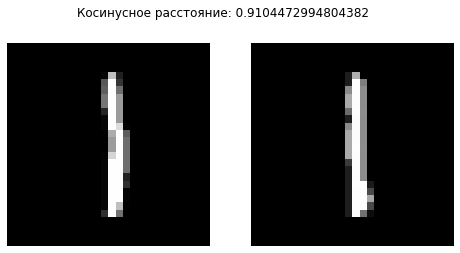

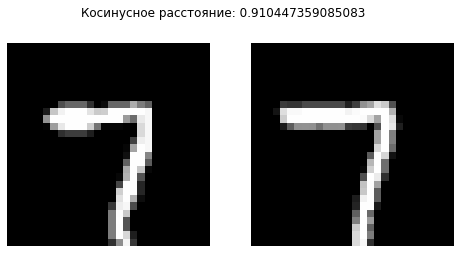

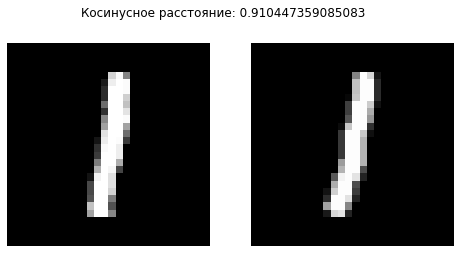

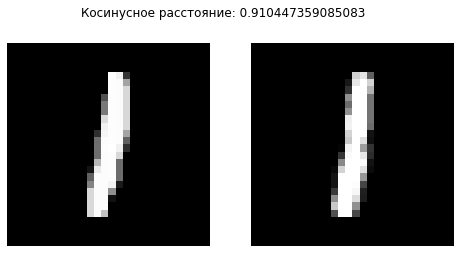

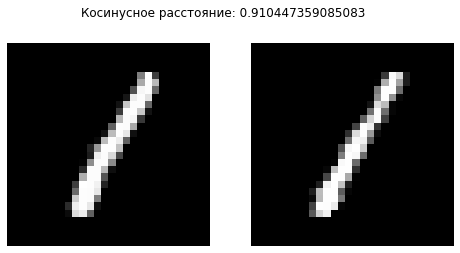

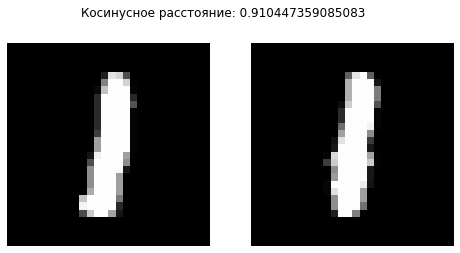

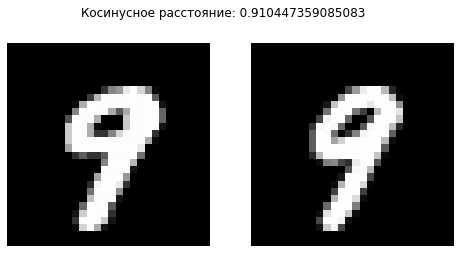

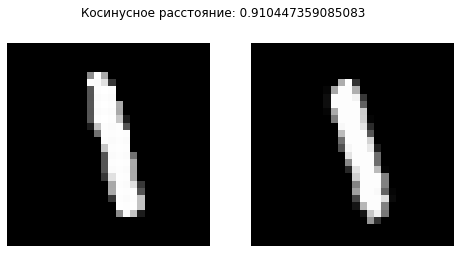

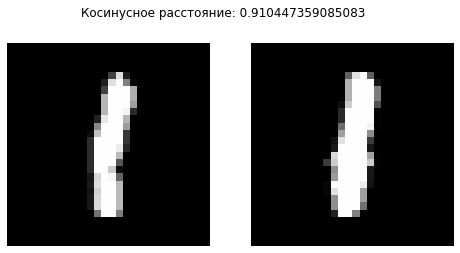

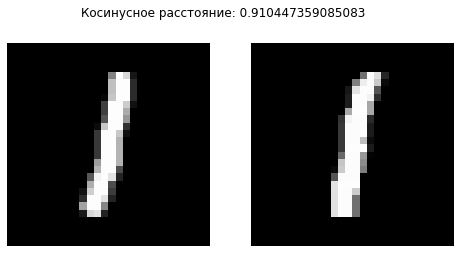

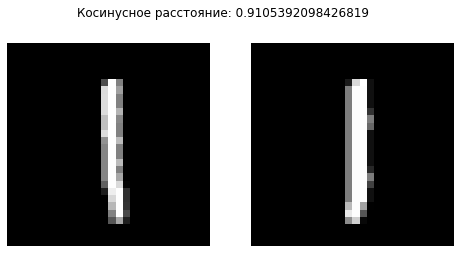

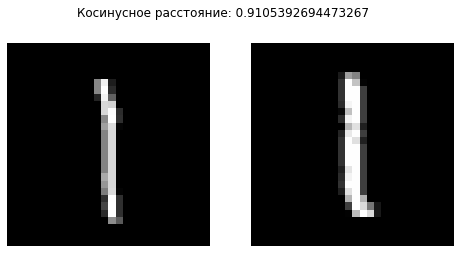

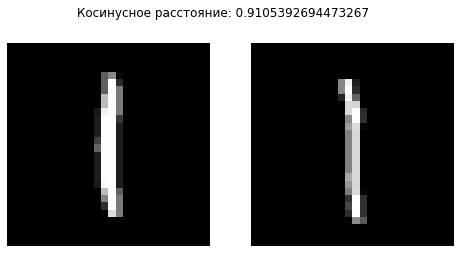

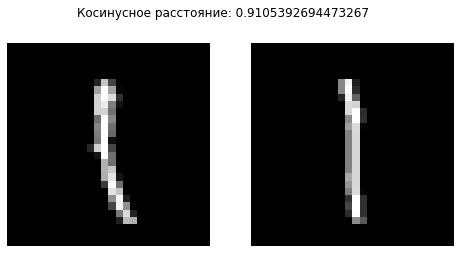

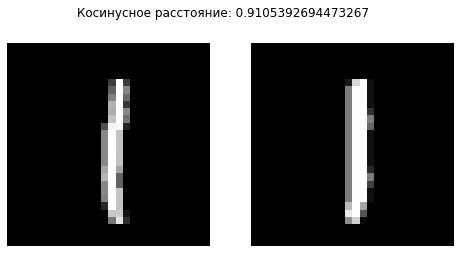

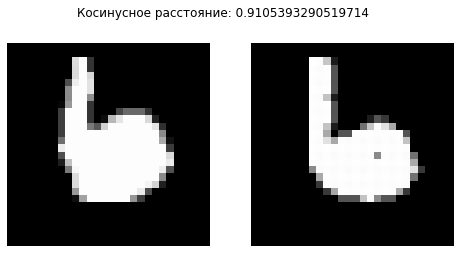

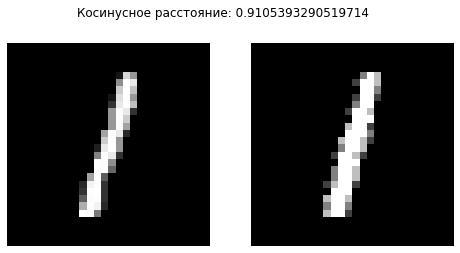

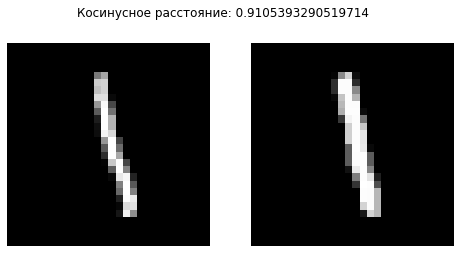

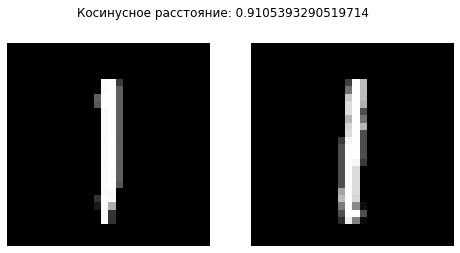

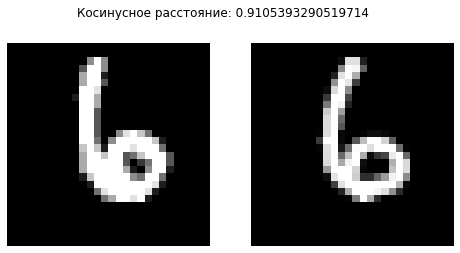

In [79]:
check(hashes1, 20, -5000, -4980)

# + GaussianNoise

In [80]:
input_img = Input((28, 28, 1))
layer = Flatten()(input_img)
layer = Dense(512, activation='relu')(layer)
layer = dropout_and_batch(layer)
layer = Dense(256, activation='relu')(layer)
layer = dropout_and_batch(layer)
layer = Dense(128, activation='relu')(layer)
gauss = GaussianNoise(1)(layer)
layer = dropout_and_batch(gauss)
encoded = Dense(64, activation='sigmoid')(layer)

layer = Dense(128, activation='relu')(encoded)
layer = dropout_and_batch(layer)
layer = Dense(256, activation='relu')(layer)
layer = dropout_and_batch(layer)
layer = Dense(512, activation='relu')(layer)
layer = dropout_and_batch(layer)
layer = Dense(28 * 28, activation='sigmoid')(layer)
decoded = Reshape((28, 28, 1))(layer)

autoencoder2 = keras.Model(input_img, decoded, name="ae_gn")

In [81]:
early_autoencoder = EarlyStopping(monitor='loss', verbose=1, patience=2)
autoencoder2.compile(loss='mse', optimizer='adam')
autoencoder2.fit(x_train, x_train, epochs=30, batch_size=100, callbacks=[early_autoencoder, 
                                                                        get_board_callback("autoencoder2")])

Epoch 1/30
600/600 [==============================] - 5s 6ms/step - loss: 0.1108
Epoch 2/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0431
Epoch 3/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0340
Epoch 4/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0319
Epoch 5/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0305
Epoch 6/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0285
Epoch 7/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0270
Epoch 8/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0257
Epoch 9/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0247
Epoch 10/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0237
Epoch 11/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0230
Epoch 12/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0225
Epoch 13/30
600/600 [====

In [82]:
encoder_gn = tf.keras.Model(autoencoder2.layers[0].input, autoencoder2.layers[12].output)
hashes_gn = np.round(encoder_gn.predict(x_test, batch_size=batch_size))

In [83]:
print(hashes_gn.shape)

(10000, 64)


In [84]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='cosine', linkage='complete')
hash_labels = cluster.fit_predict(hashes_gn)

In [85]:
hash_labels.shape

(10000,)

In [86]:
gini_indexes2 = [gini(y_test[hash_labels == i]) for i in range(10)]
gini_indexes2

[0.7121717385869467,
 0.8172048479153136,
 0.7342463139257713,
 0.6917123966942149,
 0.724312730336324,
 0.7461645371500153,
 0.8109975961538461,
 0.6568739521414417,
 0.7946851579887659,
 0.5612466041940112]

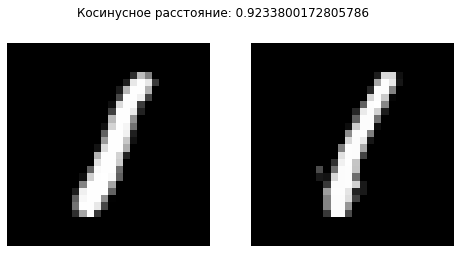

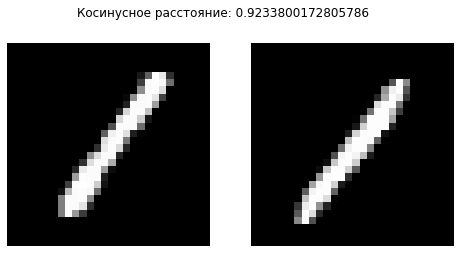

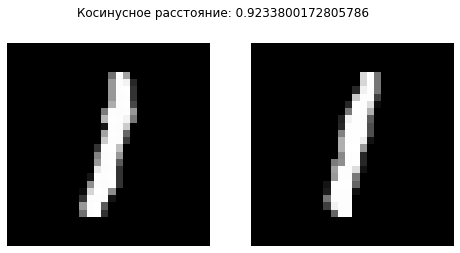

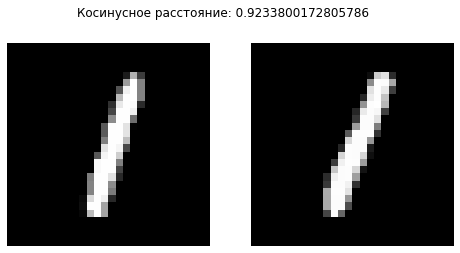

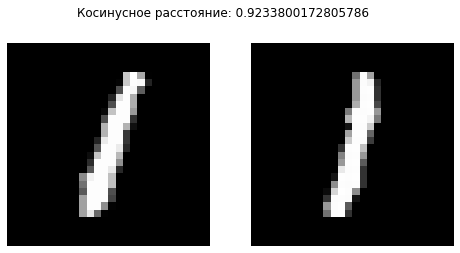

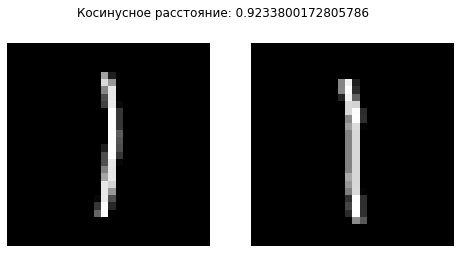

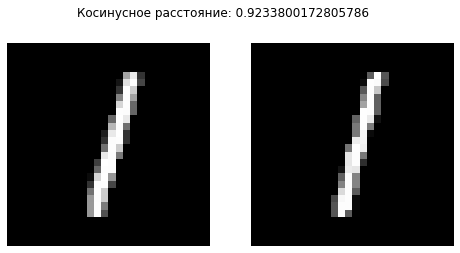

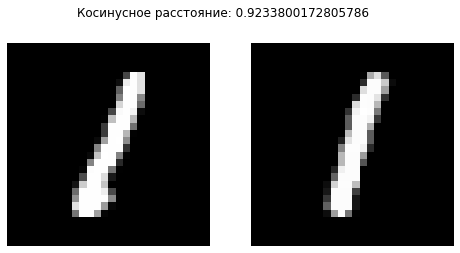

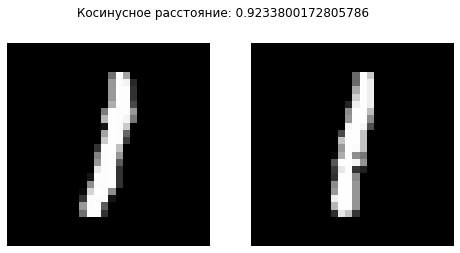

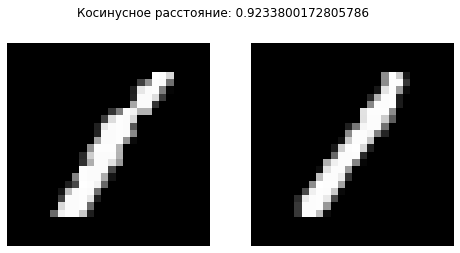

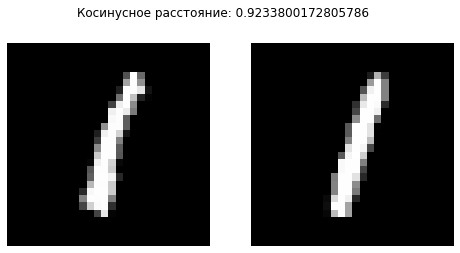

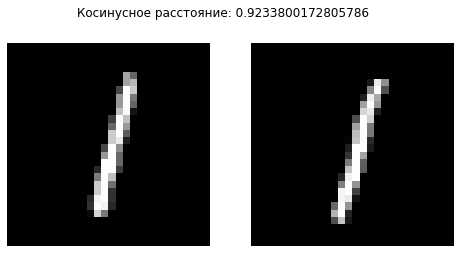

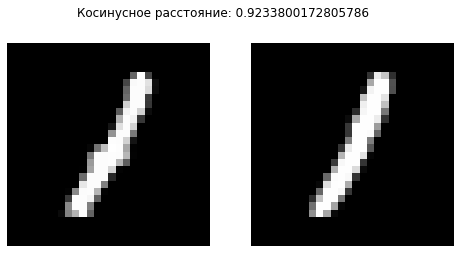

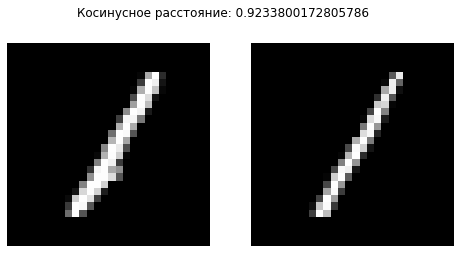

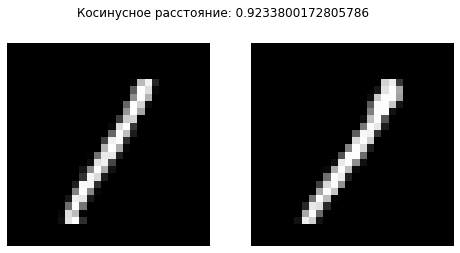

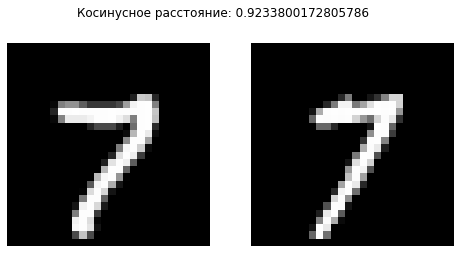

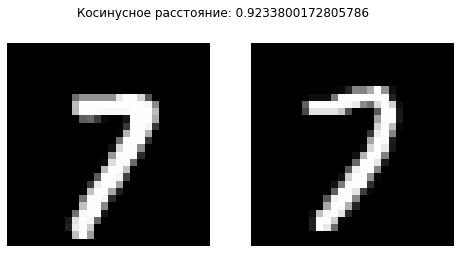

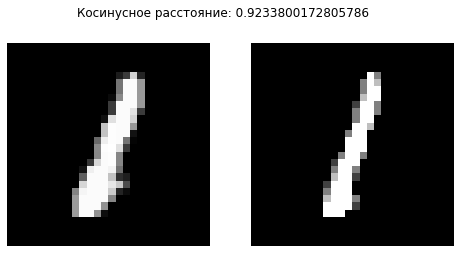

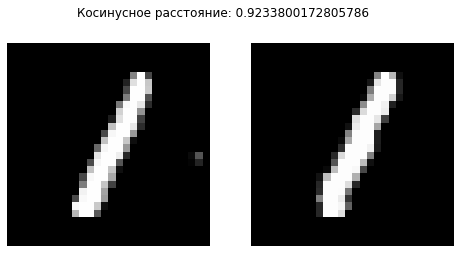

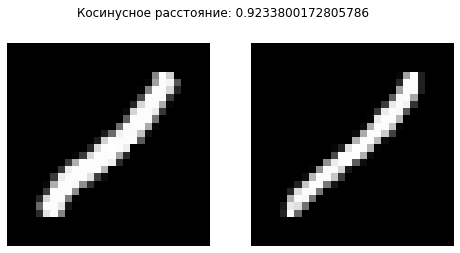

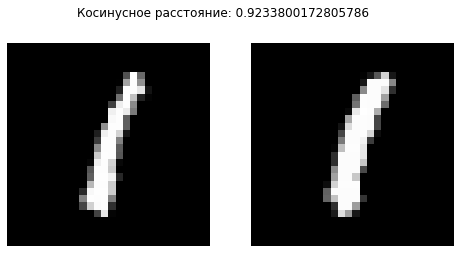

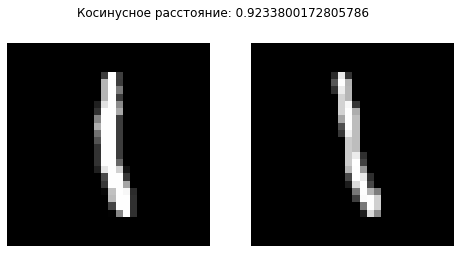

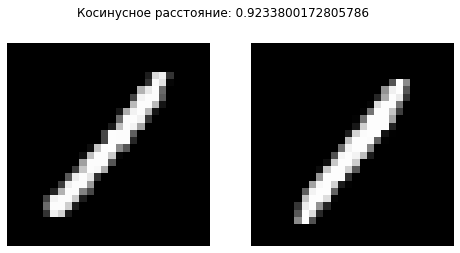

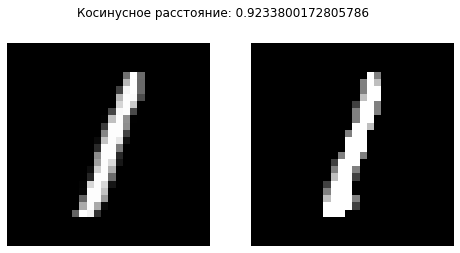

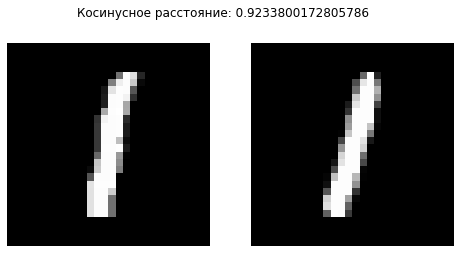

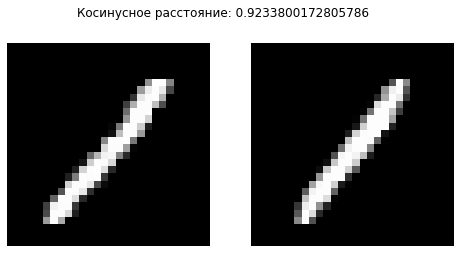

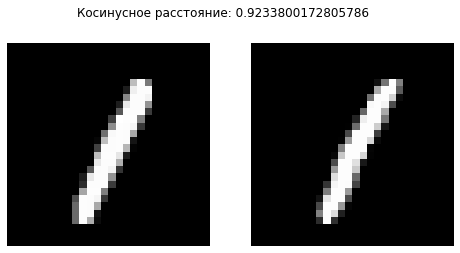

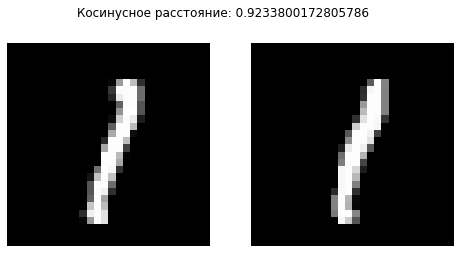

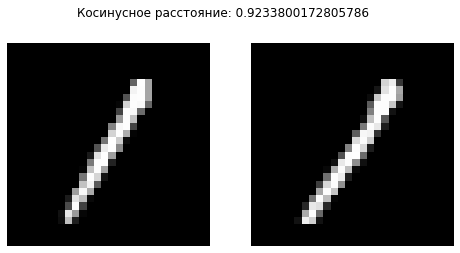

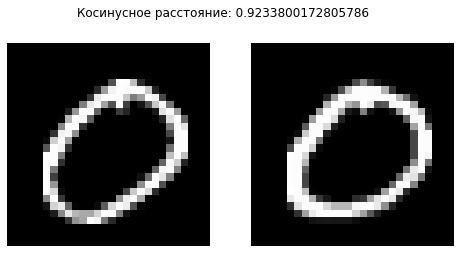

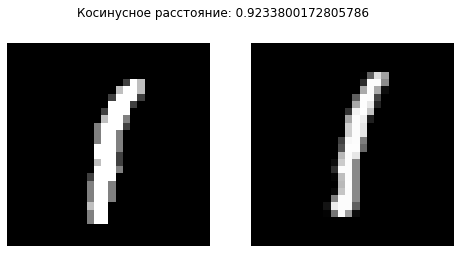

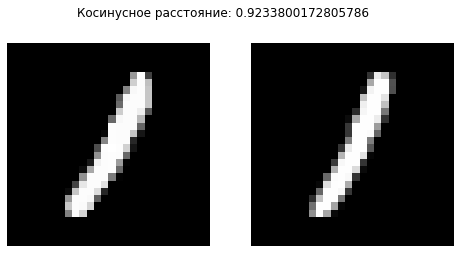

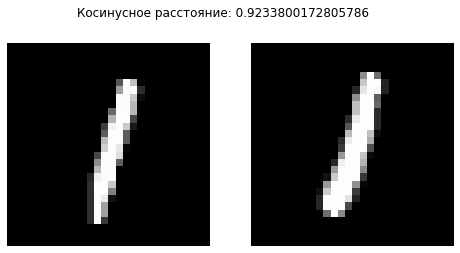

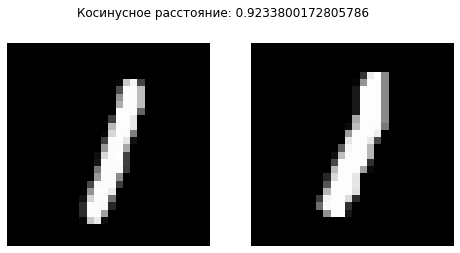

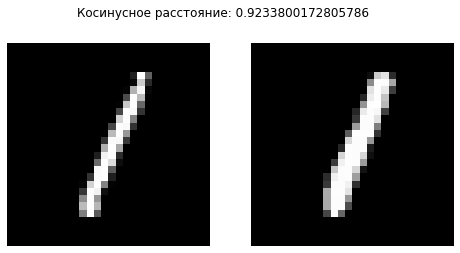

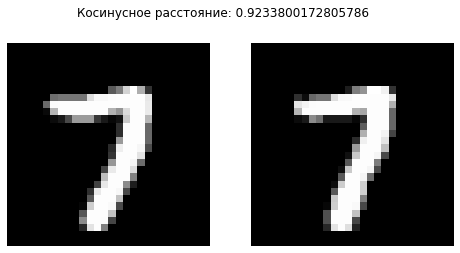

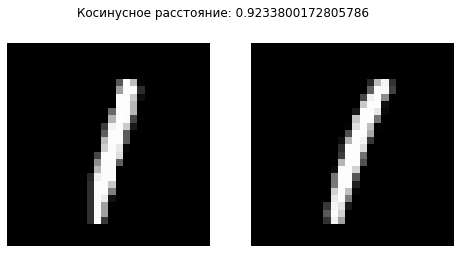

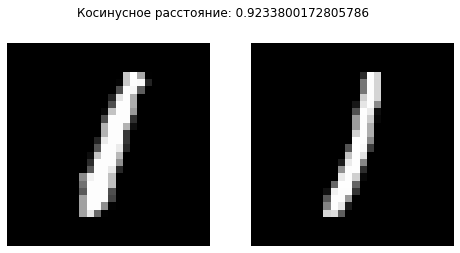

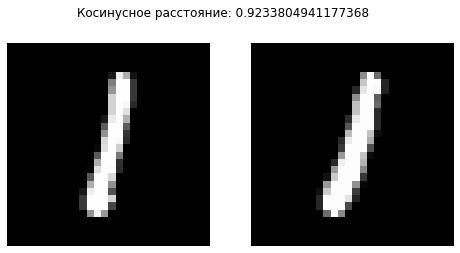

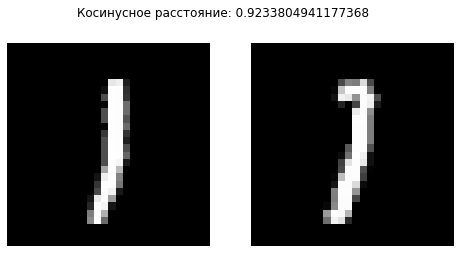

In [89]:
check(hashes_gn, 40, -6000, -5960)